In [72]:
import time
import numpy as np
from matplotlib import pyplot as plt

In [55]:
def pbil(d, N, theta1, theta2, theta3, F, max_iters=1000, return_history=True):
    p = np.full(d, 0.5)
    loss_history = np.empty(max_iters)
    for i in range(max_iters):
        P = (np.random.uniform(size=(N, d)) < p) * 1
        x = P[np.argmax(F(P)), :] # best individual
        loss_history[i] = F(x.reshape(1, -1))
        p = p * (1 - theta1) + x * theta1
        p = p + (-p * theta3 + (np.random.uniform(size=d) < 0.5) * theta3) * (np.random.uniform(size=d) < theta2)
    if return_history:
        return p, loss_history
    return p

In [70]:
def onemax(x):
    return np.sum(x, axis=1)

def deconemax(x):
    sums = np.sum(x, axis=1)
    return (sums == 0) * (x.shape[1] + 1) + (sums != 0) * sums

def kdeconemax(x, k):
    assert x.shape[1] % k == 0
    n = int(x.shape[1] / k)
    res = np.zeros(x.shape[0])
    for i in range(k):
        res += deconemax(x[:, i*n:(i+1)*n])
    return res

### OneMax

mean(p)=0.9578577967148254 std(p)=0.03700638639604116
time elapsed: 0.15296721458435059


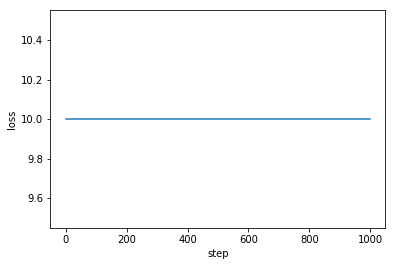

In [79]:
d = 10
N = 1000
theta1 = 0.1
theta2 = 0.1
theta3 = 0.1

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, onemax)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

mean(p)=0.950249630896624 std(p)=0.04986706636244653
time elapsed: 1.052008867263794


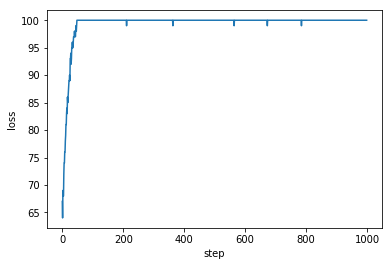

In [80]:
d = 100
N = 1000
theta1 = 0.1
theta2 = 0.1
theta3 = 0.1

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, onemax)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

mean(p)=0.8312374944896791 std(p)=0.17117466608413953
time elapsed: 14.477002382278442


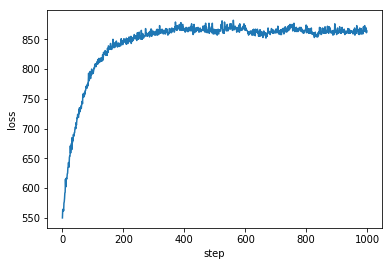

In [81]:
d = 1000
N = 1000
theta1 = 0.1
theta2 = 0.1
theta3 = 0.1

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, onemax)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

mean(p)=0.8371240506292695 std(p)=0.1589284390515584
time elapsed: 158.83939695358276


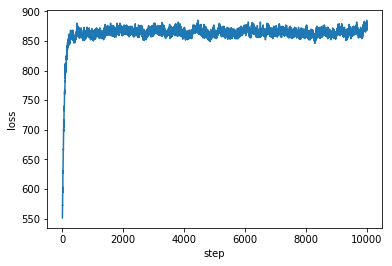

In [82]:
d = 1000
N = 1000
theta1 = 0.1
theta2 = 0.1
theta3 = 0.1

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, onemax, max_iters=10000)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

mean(p)=0.6321430471053782 std(p)=0.25617828986837965
time elapsed: 15.140003204345703


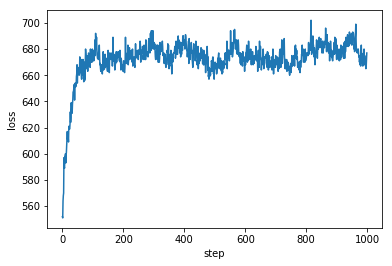

In [83]:
d = 1000
N = 1000
theta1 = 0.1
theta2 = 0.1
theta3 = 0.3

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, onemax, max_iters=1000)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

mean(p)=0.6370353501031528 std(p)=0.19751819274452834
time elapsed: 15.53584623336792


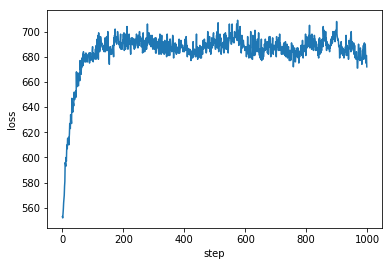

In [84]:
d = 1000
N = 1000
theta1 = 0.1
theta2 = 0.3
theta3 = 0.1

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, onemax, max_iters=1000)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

mean(p)=0.7189568587069323 std(p)=0.2647177860002641
time elapsed: 14.544998407363892


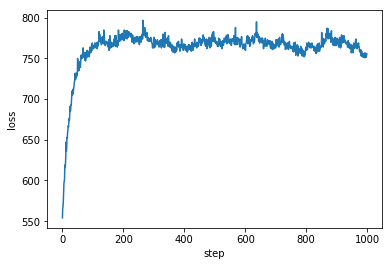

In [85]:
d = 1000
N = 1000
theta1 = 0.2
theta2 = 0.3
theta3 = 0.1

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, onemax, max_iters=1000)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

### Deceptive OneMax

mean(p)=0.03494645162958786 std(p)=0.056376723192791266
time elapsed: 0.16899824142456055


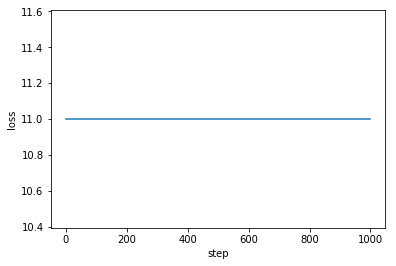

In [86]:
d = 10
N = 1000
theta1 = 0.1
theta2 = 0.1
theta3 = 0.1

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, deconemax)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

mean(p)=0.9564140087912395 std(p)=0.04476628564626621
time elapsed: 1.0530028343200684


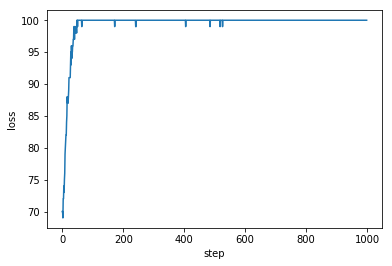

In [87]:
d = 100
N = 1000
theta1 = 0.1
theta2 = 0.1
theta3 = 0.1

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, deconemax)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

mean(p)=0.8278644554914196 std(p)=0.17490483194765052
time elapsed: 14.33996844291687


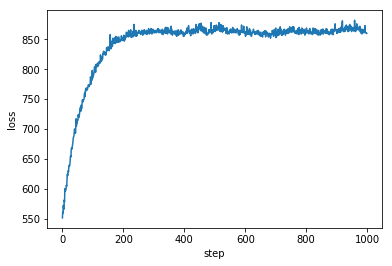

In [88]:
d = 1000
N = 1000
theta1 = 0.1
theta2 = 0.1
theta3 = 0.1

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, deconemax)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

mean(p)=0.8305897294068796 std(p)=0.17182739201551678
time elapsed: 151.83750987052917


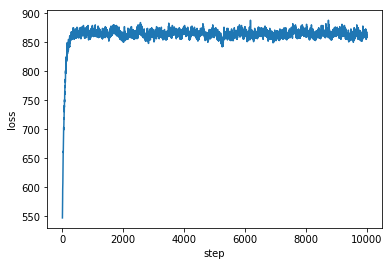

In [89]:
d = 1000
N = 1000
theta1 = 0.1
theta2 = 0.1
theta3 = 0.1

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, deconemax, max_iters=10000)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

### K-deceptive OneMax

mean(p)=0.08916529018638845 std(p)=0.04928679170638158
time elapsed: 0.3209953308105469


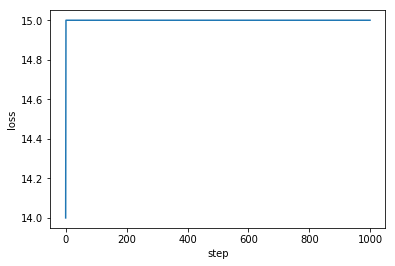

In [91]:
d = 10
N = 1000
theta1 = 0.1
theta2 = 0.1
theta3 = 0.1

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, lambda x: kdeconemax(x, 5), max_iters=1000)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

mean(p)=0.9532427209734142 std(p)=0.04594405019819631
time elapsed: 1.2489638328552246


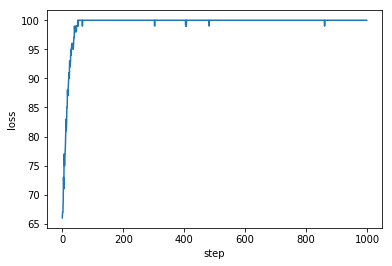

In [92]:
d = 100
N = 1000
theta1 = 0.1
theta2 = 0.1
theta3 = 0.1

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, lambda x: kdeconemax(x, 5), max_iters=1000)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

mean(p)=0.8272117936333409 std(p)=0.17444860559667177
time elapsed: 16.108967542648315


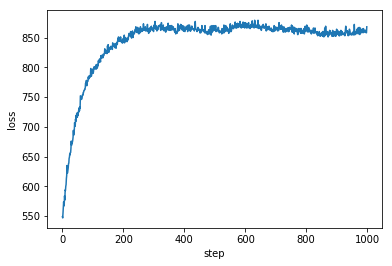

In [93]:
d = 1000
N = 1000
theta1 = 0.1
theta2 = 0.1
theta3 = 0.1

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, lambda x: kdeconemax(x, 5), max_iters=1000)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

mean(p)=0.8259733941885905 std(p)=0.17188931878004277
time elapsed: 157.17799973487854


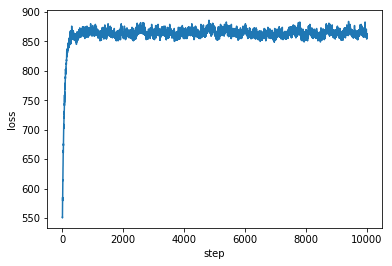

In [94]:
d = 1000
N = 1000
theta1 = 0.1
theta2 = 0.1
theta3 = 0.1

t0 = time.time()
p, history = pbil(d, N, theta1, theta2, theta3, lambda x: kdeconemax(x, 5), max_iters=10000)
print(f'mean(p)={np.mean(p)} std(p)={np.std(p)}')
print(f'time elapsed: {time.time() - t0}')

plt.plot(np.arange(history.shape[0]), history)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()